# Import Libraries

In [1]:
# image data
from sklearn.datasets import load_digits

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [2]:
# load digit data
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [3]:
from tensorflow.keras.datasets import mnist
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
y_train_raw = y_train_raw.reshape(-1, )
y_test_raw = y_test_raw.reshape(-1, )

y_train_raw.shape, y_test_raw.shape

((60000,), (10000,))

In [5]:
# create dummies for the target labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [6]:
from tensorflow.keras.utils import normalize

X_train = normalize(X_train_raw, axis=1)

X_test = normalize(X_test_raw, axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [7]:
y_train.sum(axis=0)

array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
       5949.], dtype=float32)

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [9]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

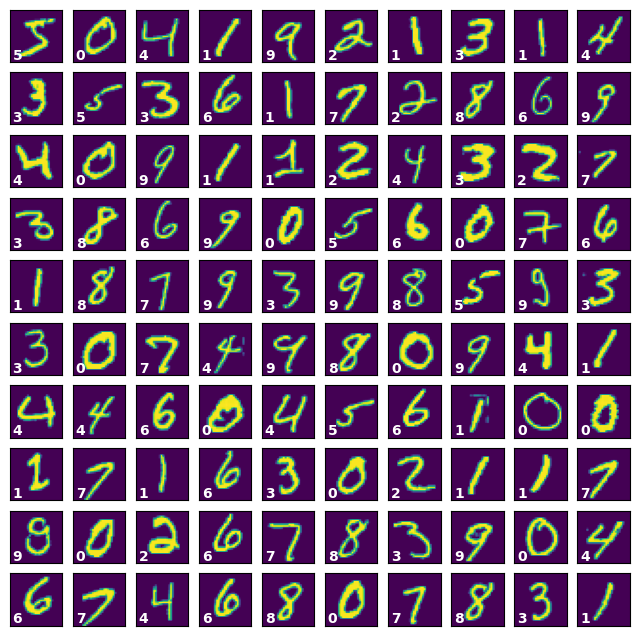

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, 
                         figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train_raw[i])
    act = y_train_raw[i]
    ax.text(0.05, 0.05, act, color='white', fontsize=10,
            weight='semibold', transform=ax.transAxes)

plt.show();

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp1 = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden')

mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# fit and validate the model
mlp1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, shuffle=True);

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2361 - accuracy: 0.9287 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0948 - accuracy: 0.9708 - val_loss: 0.0978 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.0875 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0923 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.0836 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0942 - val_accuracy:

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# initialize seeds
init_seeds(314)

cnn = Sequential(
    [
        Conv2D(filters=32, 
               kernel_size=(3, 3), 
               activation='relu', 
               input_shape=(28, 28,1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train, y_train, epochs=5, shuffle=True);

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1716 - accuracy: 0.9469
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0558 - accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0356 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 53s 28m

In [13]:

loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0787 - accuracy: 0.9847
Loss: 7.87%, Accuracy: 98.47%


In [14]:
# predicted probabilities for each class
probs = cnn.predict(X_test)
probs[:3]

313/313 [==============================] - 2s 5ms/step


array([[3.3026367e-15, 3.7247677e-11, 1.5699206e-11, 3.2930278e-10,
        4.2671408e-13, 8.2706474e-15, 2.5917993e-19, 1.0000000e+00,
        5.6015000e-14, 7.2829650e-12],
       [1.4356542e-10, 2.9000418e-09, 1.0000000e+00, 1.2646516e-11,
        3.6321937e-15, 1.0215281e-18, 1.2887067e-15, 7.7302912e-12,
        1.8031143e-12, 1.8831051e-17],
       [2.1958196e-13, 1.0000000e+00, 2.8912737e-11, 1.5411803e-15,
        1.7460557e-12, 3.2862900e-13, 2.9306269e-11, 3.7467141e-11,
        1.5780504e-11, 6.8625776e-14]], dtype=float32)

In [15]:
# grab the predictions (predicted labels) from the model
preds = [digits.target[np.argmax(p)] for p in probs]
preds[:3]

[7, 2, 1]

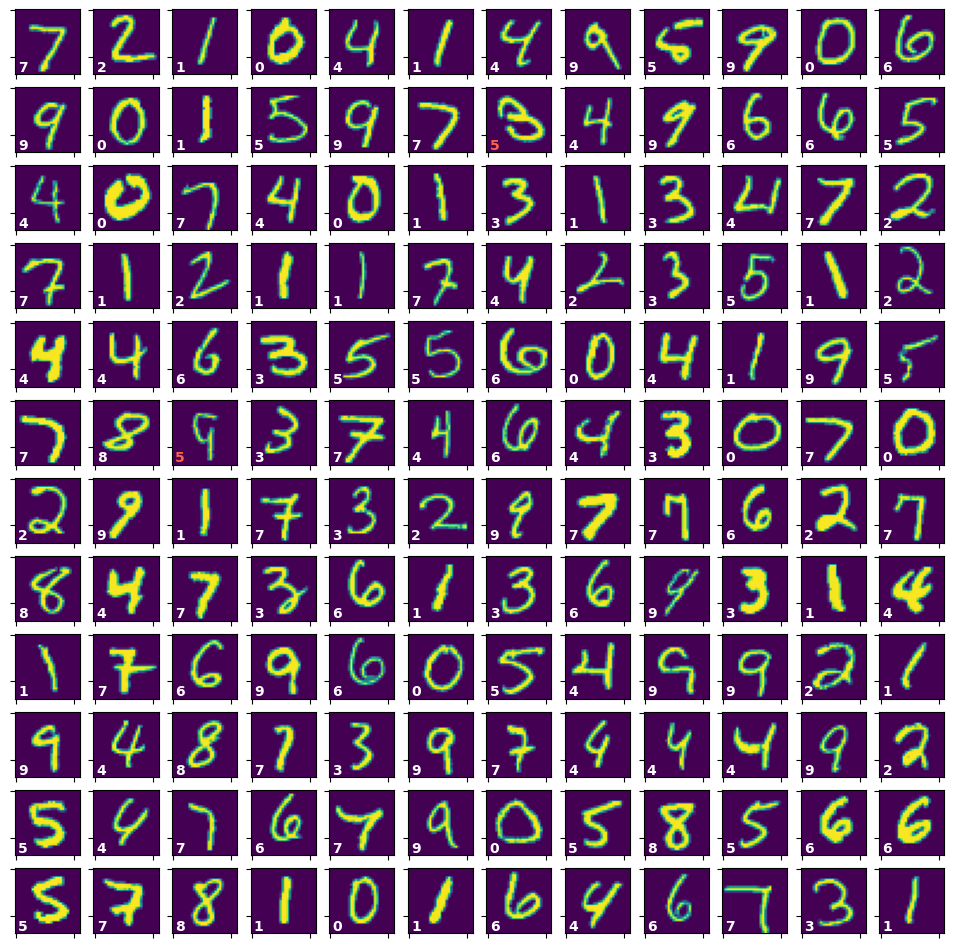

In [18]:
_, axes = plt.subplots(12, 12, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test_raw[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = y_test_raw[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='white',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();